In [39]:
import os.path as op
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from scipy.stats import spearmanr
import pandas as pd
from scipy.ndimage import gaussian_filter1d

In [13]:
subject_ids=['COM013','COM023','COM033','COM040']
groups={
    'COM013': 'ASD',
    'COM023': 'ASD',
    'COM033': 'TD',
    'COM040': 'TD'
}
epoch_types=['STIM','RESP']
condition_names=['SHORT','LONG']

In [3]:
td_color=np.array([27,158,119])/255.0
asd_color=np.array([117,112,179])/255.0

In [4]:
all_bursts = {
    'subject_id': [],
    'group': [],
    'epoch_type': [],
    'condition': [],
    'channel': [],
    'trial': [],
    'waveform': np.zeros((0, 156)),
    'waveform_times': [],
    'peak_freq': [],
    'peak_amp_iter': [],
    'peak_amp_base': [],
    'peak_time': [],
    'peak_adjustment': [],
    'fwhm_freq': [],
    'fwhm_time': [],
    'polarity': [],
}

for subject_id in subject_ids:
    group=groups[subject_id]
    
    subject_data_dir=op.join('/home/common/bonaiuto/gogo_bursts/derivatives/processed',group,subject_id)
    fname = op.join(subject_data_dir, f'{subject_id}_bursts.pickle')
    if op.exists(fname):
        with open(fname,'rb') as file:
            bursts=pickle.load(file)
        for key in bursts.keys():
            if key=='waveform_times':
                all_bursts[key] = bursts[key]
            elif key=='waveform':
                all_bursts[key] = np.vstack([all_bursts[key], bursts[key]])
            else:
                all_bursts[key] = np.hstack([all_bursts[key], bursts[key]])

In [53]:
td_idx=all_bursts['group']=='TD'
asd_idx=all_bursts['group']=='ASD'
stim_idx = all_bursts['epoch_type']=='STIM'
resp_idx = all_bursts['epoch_type']=='RESP'

In [52]:
n_td=len(np.unique(all_bursts['subject_id'][td_idx]))
n_asd=len(np.unique(all_bursts['subject_id'][asd_idx]))
print(f'N typical={n_td}')
print(f'N ASD={n_asd}')

N typical=2
N ASD=2


Text(0.5, 0, 'Duration (ms)')

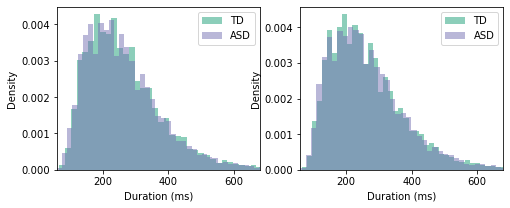

In [54]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['fwhm_time'][td_idx & stim_idx]*1000,
    100,
    alpha=.5,
    label='TD',
    density=True,
    color=td_color
)
plt.hist(
    all_bursts['fwhm_time'][asd_idx & stim_idx]*1000,
    100,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['fwhm_time']*1000,[0,99]))
plt.ylabel('Density')
plt.xlabel('Duration (ms)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['fwhm_time'][td_idx & resp_idx]*1000,
    100,
    alpha=.5,
    label='TD',
    density=True,
    color=td_color
)
plt.hist(
    all_bursts['fwhm_time'][asd_idx & resp_idx]*1000,
    100,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['fwhm_time']*1000,[0,99]))
plt.ylabel('Density')
plt.xlabel('Duration (ms)')

Text(0.5, 0, 'Amplitude (fT)')

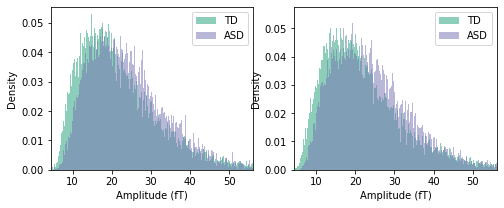

In [55]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['peak_amp_base'][td_idx & stim_idx]*1e15,
    1000,
    alpha=.5,
    label='TD',
    density=True, 
    color=td_color
)
plt.hist(
    all_bursts['peak_amp_base'][asd_idx & stim_idx]*1e15,
    1000,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['peak_amp_base']*1e15,[0,99]))
plt.ylabel('Density')
plt.xlabel('Amplitude (fT)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['peak_amp_base'][td_idx & resp_idx]*1e15,
    1000,
    alpha=.5,
    label='TD',
    density=True, 
    color=td_color
)
plt.hist(
    all_bursts['peak_amp_base'][asd_idx & resp_idx]*1e15,
    1000,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.xlim(np.percentile(all_bursts['peak_amp_base']*1e15,[0,99]))
plt.ylabel('Density')
plt.xlabel('Amplitude (fT)')

Text(0.5, 0, 'Peak frequency (Hz)')

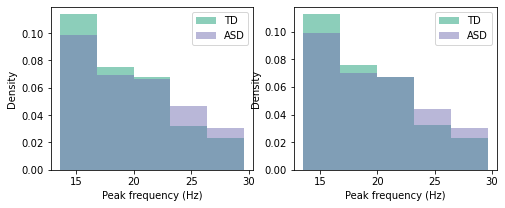

In [56]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['peak_freq'][td_idx & stim_idx],
    5,
    alpha=.5,
    label='TD',
    density=True, 
    color=td_color
)
plt.hist(
    all_bursts['peak_freq'][asd_idx & stim_idx],
    5,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.ylabel('Density')
plt.xlabel('Peak frequency (Hz)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['peak_freq'][td_idx & resp_idx],
    5,
    alpha=.5,
    label='TD',
    density=True, 
    color=td_color
)
plt.hist(
    all_bursts['peak_freq'][asd_idx & resp_idx],
    5,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.ylabel('Density')
plt.xlabel('Peak frequency (Hz)')

Text(0.5, 0, 'Frequency span (Hz)')

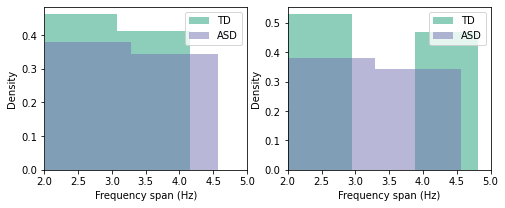

In [57]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
plt.hist(
    all_bursts['fwhm_freq'][td_idx & stim_idx],
    15,
    alpha=.5,
    label='TD',
    density=True, 
    color=td_color
)
plt.hist(
    all_bursts['fwhm_freq'][asd_idx & stim_idx],
    11,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.xlim([2,5])
plt.ylabel('Density')
plt.xlabel('Frequency span (Hz)')

ax=plt.subplot(1,2,2)
plt.hist(
    all_bursts['fwhm_freq'][td_idx & resp_idx],
    15,
    alpha=.5,
    label='TD',
    density=True, 
    color=td_color
)
plt.hist(
    all_bursts['fwhm_freq'][asd_idx & resp_idx],
    11,
    alpha=.5,
    label='ASD',
    density=True,
    color=asd_color
)
plt.legend()
plt.xlim([2,5])
plt.ylabel('Density')
plt.xlabel('Frequency span (Hz)')

min=0.557199981033965, max=0.9970349765295317


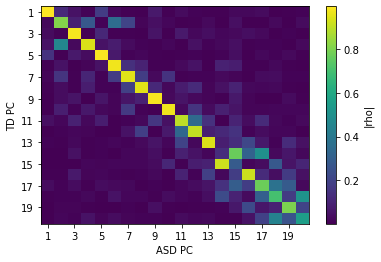

In [58]:
waveform_times=all_bursts['waveform_times']
td_pca = PCA(n_components=20)
td_burst_std=RobustScaler().fit_transform(all_bursts['waveform'][td_idx,:])
td_pca=td_pca.fit(td_burst_std)

asd_pca = PCA(n_components=20)
asd_burst_std=RobustScaler().fit_transform(all_bursts['waveform'][asd_idx,:])
asd_pca=asd_pca.fit(asd_burst_std)

def spearman_correlation_matrix(pca1, pca2):
    eigenvectors1 = pca1.components_.T
    eigenvectors2 = pca2.components_.T
    n_components = eigenvectors1.shape[1]
    
    corr_matrix = np.zeros((n_components, n_components))
    for i in range(n_components):
        for j in range(n_components):
            corr, _ = spearmanr(eigenvectors1[:, i], eigenvectors2[:, j])
            corr_matrix[i, j] = abs(corr)  # Absolute value of the Spearman correlation
    return corr_matrix

pca_corr_matrix = spearman_correlation_matrix(td_pca, asd_pca)
max_corrs=[]
for i in range(pca_corr_matrix.shape[0]):
    max_corrs.append(np.max(pca_corr_matrix[i,:]))
print(f'min={np.min(max_corrs)}, max={np.max(max_corrs)}')

plt.figure()
ax=plt.subplot(1,1,1)
im=ax.imshow(pca_corr_matrix, cmap='viridis', aspect='auto')
plt.colorbar(im, label="|rho|")
ax.set_xlabel('ASD PC')
ax.set_ylabel('TD PC')
ax.set_xticks(np.arange(0,20,2))
ax.set_xticklabels(np.arange(0,20,2)+1)
ax.set_yticks(np.arange(0,20,2))
_=ax.set_yticklabels(np.arange(0,20,2)+1)

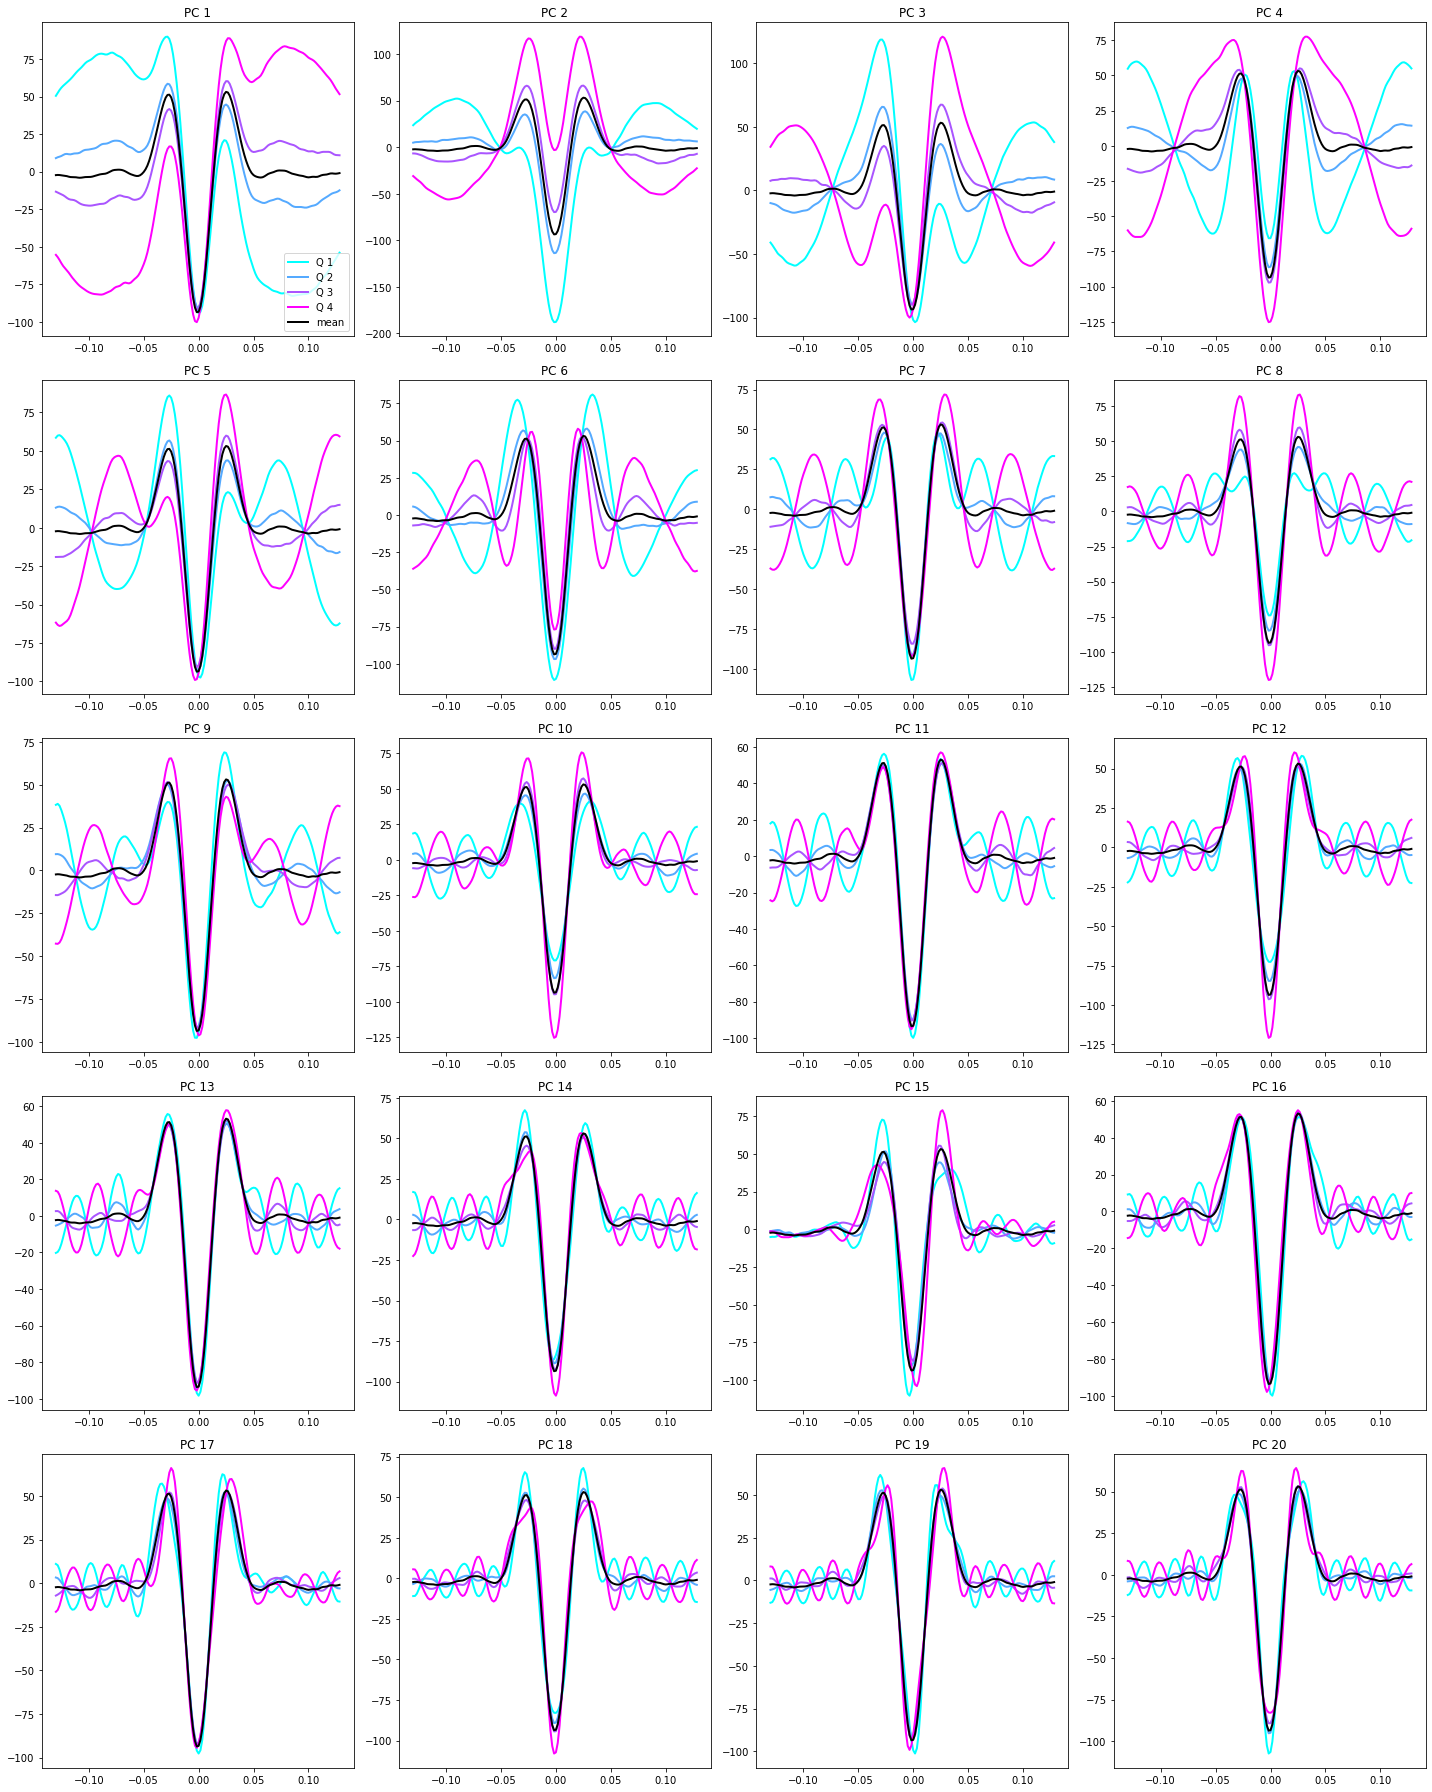

In [59]:
waveforms=all_bursts['waveform']
model = PCA(n_components=20)
scaler = RobustScaler().fit(waveforms)
burst_std = scaler.transform(waveforms)
model.fit(burst_std)
pc_scores = model.transform(burst_std)  # all the bursts x 20 components
pc_labels = ["PC_{}".format(i+1) for i in range(pc_scores.shape[1])]

quartiles = np.linspace(0, 100, num=5)
quartiles = list(zip(quartiles[:-1], quartiles[1:]))
col_range = plt.cm.cool(np.linspace(0, 1, num=len(quartiles)))
mean_waveform = np.mean(waveforms, axis=0)

f, ax = plt.subplots(5, 4, figsize=(20, 25))
ax = ax.flatten()
for pc_ix, pc in enumerate(pc_labels):
    ax[pc_ix].set_title(pc.replace("_", " "))  # set the nice title
    scores = pc_scores[:,pc_ix]
    q_maps = []
    for q_ix, (b, e) in enumerate(quartiles):
        q_map = (scores > np.percentile(scores, b)) & (scores <= np.percentile(scores, e))  # create a boolean map to select the waveforms
        q_mean = np.mean(waveforms[q_map], axis=0)
        ax[pc_ix].plot(waveform_times, q_mean/1e-15, lw=2, c=col_range[q_ix], label="Q {}".format(q_ix+1))
    ax[pc_ix].plot(waveform_times, mean_waveform/1e-15, lw=2, c="black", label="mean")
ax[0].legend(fontsize=10)

plt.tight_layout()
plt.show()

In [60]:
bin_width = 0.05
time_bins = np.arange(-.5, 1, bin_width)

subject_score_ts={epoch_type: {group: [] for group in ['ASD','TD']} for epoch_type in epoch_types}
for subject_id in subject_ids:
    subject_group=groups[subject_id]
    for epoch_type in epoch_types:
        b_idx=(all_bursts['subject_id']==subject_id) & (all_bursts['epoch_type']==epoch_type)
        pc_score_ts=[]
        for t_idx in range(len(time_bins)-1):
            st=time_bins[t_idx]
            en=time_bins[t_idx+1]
            bb_idx=b_idx & (all_bursts['peak_time']>=st) & (all_bursts['peak_time']<=en)
            ms=np.nanmean(pc_scores[bb_idx,:],axis=0)
            pc_score_ts.append(ms)
        pc_score_ts=np.array(pc_score_ts)
        pc_score_ts = gaussian_filter1d(pc_score_ts, sigma=1, axis=0, mode="nearest")
        subject_score_ts[epoch_type][subject_group].append(pc_score_ts)
for epoch_type in epoch_types:
    for group in ['ASD','TD']:
        subject_score_ts[epoch_type][group]=np.array(subject_score_ts[epoch_type][group])

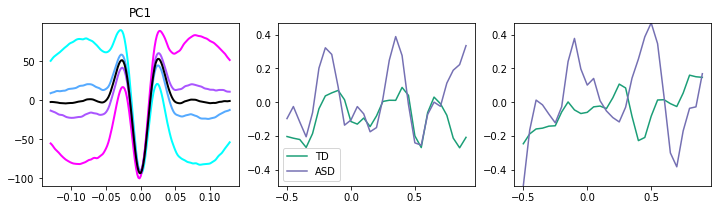

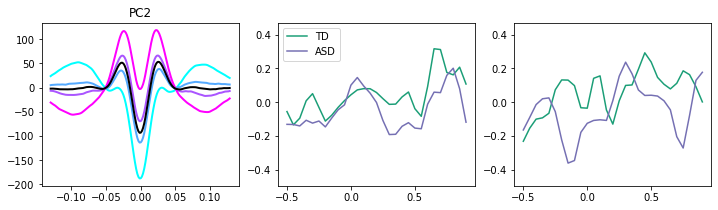

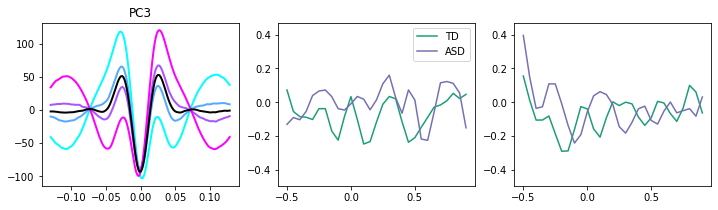

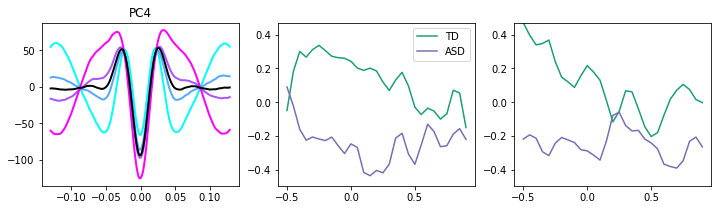

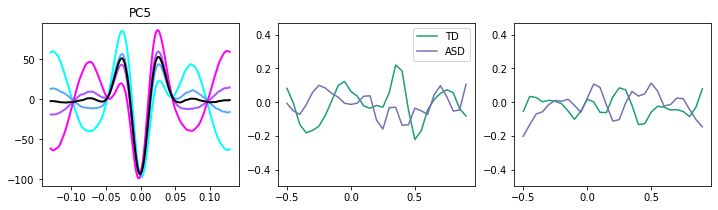

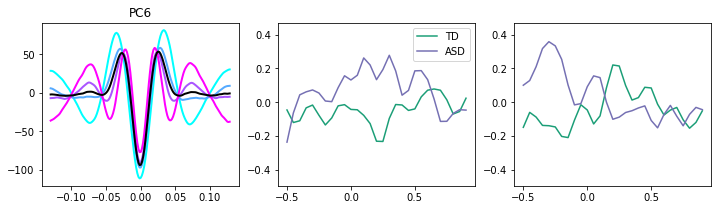

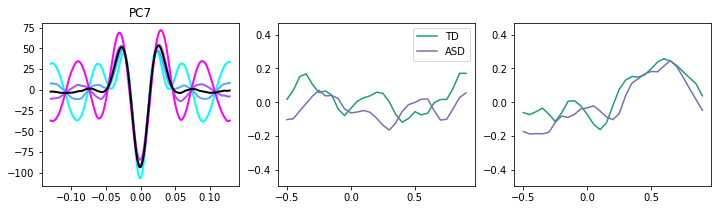

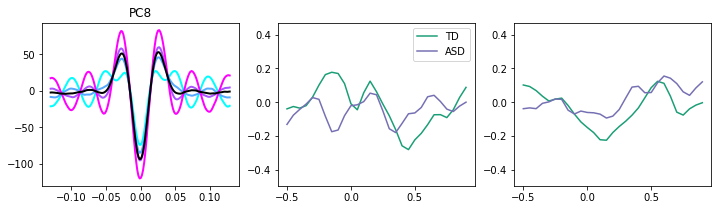

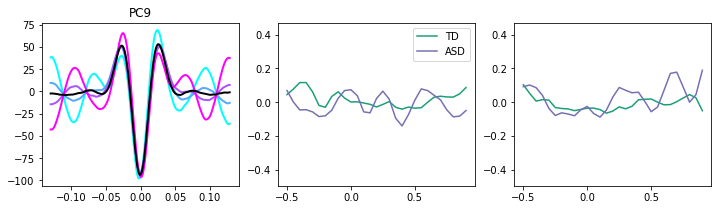

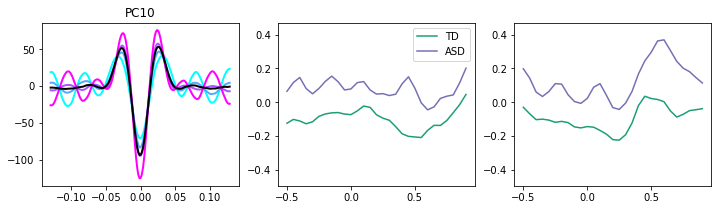

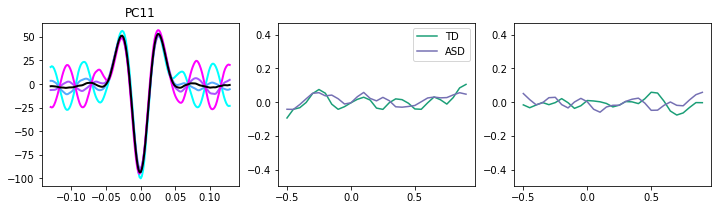

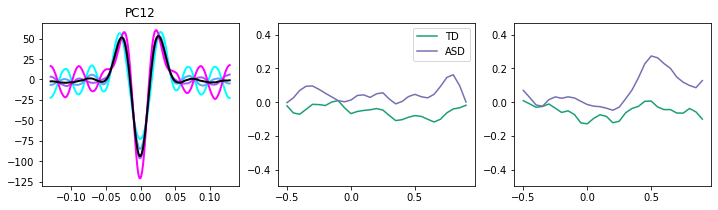

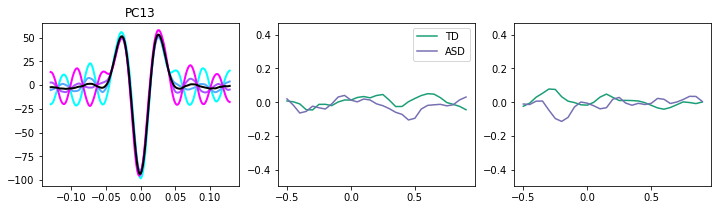

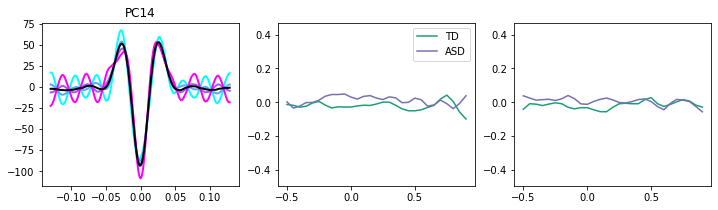

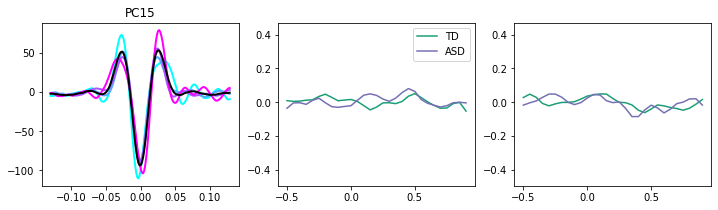

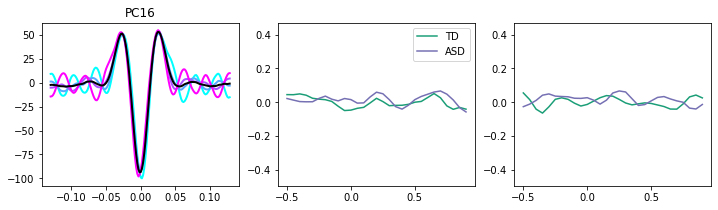

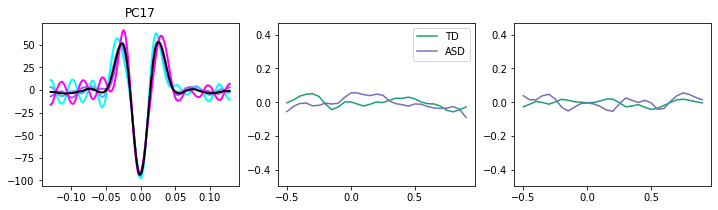

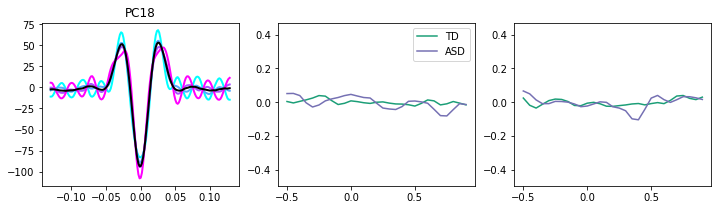

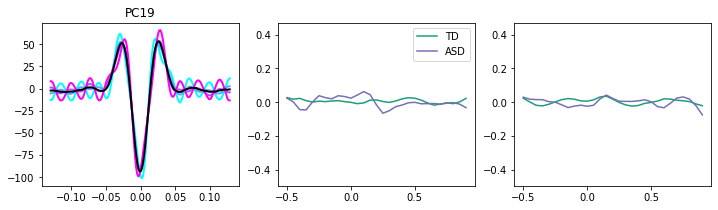

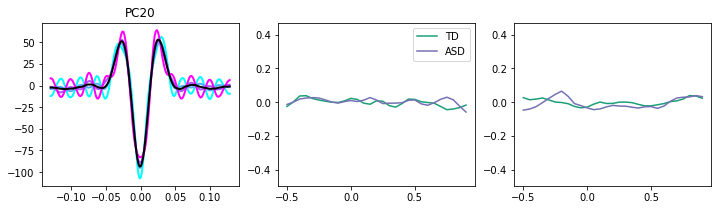

In [61]:
# --- compute global limits across all PCs and conditions ---
all_vals = []
for pc in range(20):
    stim_td = np.nanmean(subject_score_ts['STIM']['TD'], axis=0)[:, pc]
    stim_asd  = np.nanmean(subject_score_ts['STIM']['ASD'],  axis=0)[:, pc]
    resp_td = np.nanmean(subject_score_ts['RESP']['TD'], axis=0)[:, pc]
    resp_asd  = np.nanmean(subject_score_ts['RESP']['ASD'],  axis=0)[:, pc]
    all_vals.extend([stim_td, stim_asd, resp_td, resp_asd])

all_vals = np.concatenate(all_vals)
finite_vals = all_vals[np.isfinite(all_vals)]
ymin, ymax = finite_vals.min(), finite_vals.max()

# --- plotting with fixed limits ---
for pc in range(20):
    plt.figure(figsize=(12,3))

    stim_td = np.nanmean(subject_score_ts['STIM']['TD'], axis=0)[:, pc]
    stim_asd  = np.nanmean(subject_score_ts['STIM']['ASD'],  axis=0)[:, pc]
    resp_td = np.nanmean(subject_score_ts['RESP']['TD'], axis=0)[:, pc]
    resp_asd  = np.nanmean(subject_score_ts['RESP']['ASD'],  axis=0)[:, pc]

    ax=plt.subplot(1,3,1)
    ax.set_title(f'PC{pc+1}')  # set the nice title
    scores = pc_scores[:,pc]
    q_maps = []
    for q_ix, (b, e) in enumerate(quartiles):
        q_map = (scores > np.percentile(scores, b)) & (scores <= np.percentile(scores, e))  # create a boolean map to select the waveforms
        q_mean = np.mean(waveforms[q_map], axis=0)
        ax.plot(waveform_times, q_mean/1e-15, lw=2, c=col_range[q_ix], label="Q {}".format(q_ix+1))
    ax.plot(waveform_times, mean_waveform/1e-15, lw=2, c="black", label="mean")
    
    # STIM
    ax1 = plt.subplot(1,3,2)
    ax1.plot(time_bins[:-1], stim_td, label='TD', color=td_color)
    ax1.plot(time_bins[:-1], stim_asd,  label='ASD', color=asd_color)
    ax1.set_ylim(ymin, ymax)
    ax1.legend()

    # RESP
    ax2 = plt.subplot(1,3,3)
    ax2.plot(time_bins[:-1], resp_td, label='TD', color=td_color)
    ax2.plot(time_bins[:-1], resp_asd,  label='ASD', color=asd_color)
    ax2.set_ylim(ymin, ymax)
